In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

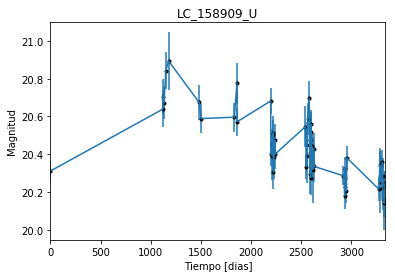

In [2]:
data = np.genfromtxt('LC_158909_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_158909_U')
plt.savefig("LC_158909_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

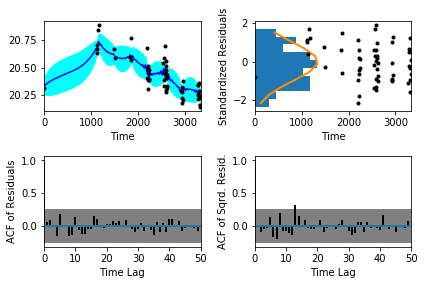

In [5]:
sample.assess_fit()

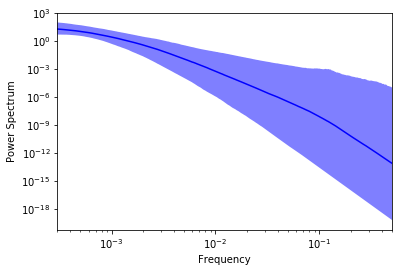

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

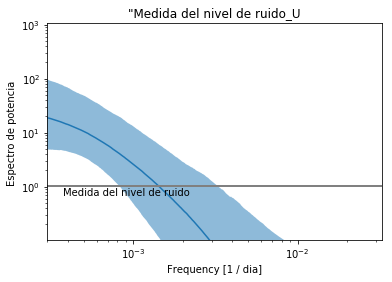

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_158909_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_158909_U')

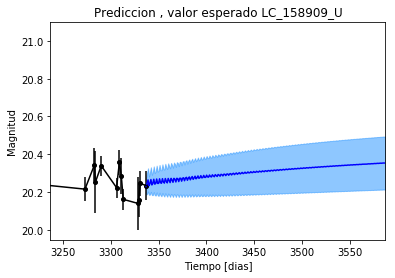

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_158909_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_158909_U')

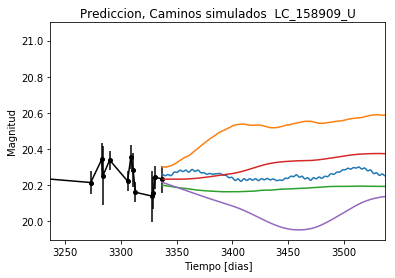

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_158909_U')

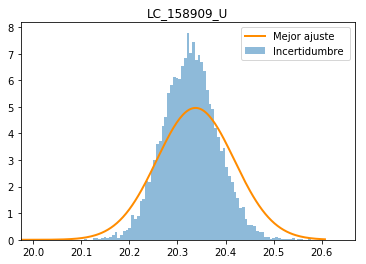

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_158909_U')
plt.savefig("Mejor_ajuste_LC_158909_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_158909_U')

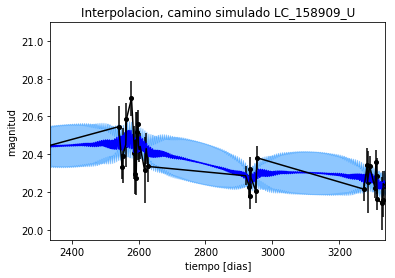

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_U')

Text(0.5,1,'Interpolacion, camino simulado LC_158909_U')

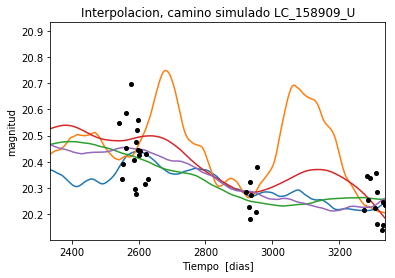

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_158909_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 485.197677674
Median: 0.0085030251409
Standard deviation: 0.203985311164
68% credibility interval: [ 0.00075402  0.19181751]
95% credibility interval: [  3.18774273e-04   8.08851548e-01]
99% credibility interval: [  3.03983065e-04   9.71997263e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 934.732410247
Median: 0.000999241732829
Standard deviation: 0.0664469710395
68% credibility interval: [ 0.00038441  0.01483764]
95% credibility interval: [ 0.00030662  0.17542421]
99% credibility interval: [  3.00764948e-04   4.77829273e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 484.704795113
Median: 0.0156988522971
Standard

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1076.93309455
Median: 69.4326236976
Standard deviation: 1.67376627348
68% credibility interval: [ 67.45374493  70.54730042]
95% credibility interval: [ 64.91279578  71.25505002]
99% credibility interval: [ 62.74353472  71.45253659]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1435.15160349
Median: 0.570942676518
Standard deviation: 2.02901699056
68% credibility interval: [ 0.05279498  3.74298303]
95% credibility interval: [ 0.01235742  6.46529073]
99% credibility interval: [  9.27683666e-03   9.50598546e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 967.595050359
Median: 0.225056877951
Standard deviation: 7.70891865725
68% credibility interval: [ 0.00798249  5.35986935]
95% credibility interval: [  5.0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310448
Median: 3.8530615946e-43
Standard deviation: 2.45266191184e+112
68% credibility interval: [  4.92516857e-117   1.70987452e-009]
95% credibility interval: [  3.24376931e-171   1.24488139e+002]
99% credibility interval: [  2.77856984e-179   1.84465369e+042]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1871.66837165
Median: 20.4362059885
Standard deviation: 0.110805420799
68% credibility interval: [ 20.33778314  20.52429894]
95% credibility interval: [ 20.20816077  20.64700721]
99% credibility interval: [ 20.07714996  20.76889391]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 521.59209677
Median: 0.000458566676468
Standard deviation: 0.225394794566
68% credibility interval: [ 0.         0.2808278]
95% credibility interval: [ 0.          0.84574727]
99% credibility interval: [ 0.          0.97202534]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 521.59209677
Median: 0.000458566676468
Standard deviation: 0.225394794566
68% credibility interval: [ 0.         0.2808278]
95% credibility interval: [ 0.          0.84574727]
99% credibility interval: [ 0.          0.97202534]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1147.99795452
Median: 0.0
Standard deviation: 0.000268423809326
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1076.93309455
Median: 69.4326236976
Standard deviation: 1.67376627348
68% credibility interval: [ 67.45374493  70.54730042]
95% credibility interval: [ 64.91279578  71.25505002]
99% credibility interval: [ 62.74353472  71.45253659]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3911.56844755
Median: 0.0326707949887
Standard deviation: 0.0536035156343
68% credibility interval: [ 0.01838116  0.06392589]
95% credibility interval: [ 0.0112607   0.14250297]
99% credibility interval: [ 0.00840244  0.25257025]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 806.62070885
Median: 1.14255946334
Standard deviation: 0.174296515098
68% credibility interval: [ 0.99014699  1.32527073]
95% credibility interval: [ 0.84634786  1.55188603]
99% credibility interval: [ 0.78346746  1.68102524]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 910.927773936
Median: 2.32744079022e-05
Standard deviation: 0.135987974824
68% credibility interval: [  4.45301664e-07   2.05457423e-03]
95% credibility interval: [  2.04813763e-09   1.64886726e-01]
99% credibility interval: [  1.32100047e-47   9.71548080e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 485.197677674
Median: (-0.0534260826319+0j)
Standard deviation: 1.91005547647
68% credibility interval: [-1.20522498-4.53974519j -0.00473766-2.53786974j]
95% credibility interval: [ -5.08216416e+00+0.j          -2.00291783e-03-0.00045161j]
99% credibility interval: [ -6.10723892e+00+0.j          -1.90998192e-03-0.00095551j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 934.732410247
Median: (-0.00627842097403+0.0920460041771j)
Standard deviation: 1.47645514372
68% credibility interval: [-0.09322764 +4.28721902e+00j -0.00241535 +3.15599926e-03j]
95% credibility interval: [-1.10222284+3.44388661j -0.00192652+0.j        ]
99% credibility interval: [ -3.00228987e+00 +4.12767299e+00j  -1.88976190e-03 +5.86630682e-04j]
Pos